# Functions, modules and all that

In this session we will look at how to structure our code. We will

* write functions and module
* put them under version control
* test our functions and modules (assert)
* document our functions
* write a simple script and call it from bash
* look at errors and tracebacks that tell us what went wrong


## Writing functions

The function syntax in Python is straightforward. There are two types of arguments, positional followed by keyword arguments.

In [6]:
def fahrenheit_to_kelvin(temperature, verbose=False):
    temp_in_kelvin = (temperature - 32) * 5/9 + 273.15
    if verbose:
        print(f"The temperature {temperature}F equals {temp_in_kelvin:0.5}K.")
        # print("The temperature {}F equals {}K.".format(temperature, temp_in_kelvin))
    return temp_in_kelvin

In [7]:
fahrenheit_to_kelvin(30, verbose=True)

The temperature 30F equals 272.04K.


272.0388888888889

In [8]:
fahrenheit_to_kelvin(30)

272.0388888888889

In [9]:
fahrenheit_to_kelvin(30, True)

The temperature 30F equals 272.04K.


272.0388888888889

* Arguments are identified either by position or by keyword. All positional arguments come before all keyword arguments. This holds for both, declaring and calling the function.

In [10]:
def the_count(one, two, three, four=4, five=5, six=6):
    print(f"One  : {one}")
    print(f"Two  : {two}")
    print(f"Three: {three}")
    print(f"Four : {four}")
    print(f"Five : {five}")
    print(f"Six  : {six}")

In [11]:
the_count(10,2,3,4,five=5,six=30)

One  : 10
Two  : 2
Three: 3
Four : 4
Five : 5
Six  : 30


In [12]:
the_count(10,2,3,4,four=5,six=30)

TypeError: the_count() got multiple values for argument 'four'

In [13]:
the_count(10,2,3,4,five=5,30)

SyntaxError: positional argument follows keyword argument (<ipython-input-13-ee7e83d88a59>, line 1)

An aside on integer division, in python 2 integer division worked differently. It always rounded down to the nearest integer. The Python 2 behavior can still be accessed via double slash:

In [14]:
print(f"Python 3 5/9 == {5/9:0.3}")
print(f"Python 3 5//9 == {5//9}")
print(f"Python 2 5/9 == {5//9}")

Python 3 5/9 == 0.556
Python 3 5//9 == 0
Python 2 5/9 == 0


In [15]:
def kelvin_to_celsius(temperature):
    return temperature - 273.15

Using functions we have defined in new functions works as expected:

In [16]:
def fahrenheit_to_celsius(temperature):
    temp_in_kelvin = fahrenheit_to_kelvin(temperature)
    return kelvin_to_celsius(temp_in_kelvin)

# Functional stuff
* you can pass functions as parameters
* (and much more that we can't cover here)

In [17]:
f2c = fahrenheit_to_celsius

In [18]:
f2c(20)

-6.666666666666686

In [19]:
def convert_many(function, temperatures):
    result = list()
    for t in temperatures:
        result.append(function(t))
    return result

In [20]:
temp_record_fahr = [10., 23., 40., -10.]
print(convert_many(f2c, temp_record_fahr))
print(map(print, temp_record_fahr))

[-12.222222222222229, -5.0, 4.444444444444457, -23.333333333333343]


An aside: Iterators and lazy evaluation

In [21]:
printing_iterator = map(print, temp_record_fahr)

In [22]:
next(printing_iterator)

10.0


# Numpy... for great justice!

Numpy is a library that allows us to work directly with entire vectors of numbers

In [46]:
import numpy as np

In [47]:
temp_record_fahr = np.array([10., 23., 40., -10.])
print(temp_record_fahr.ndim)
print(temp_record_fahr.shape)

1
(4,)


In [48]:
np.apply_along_axis(f2c, 0, temp_record_fahr)

array([-12.22222222,  -5.        ,   4.44444444, -23.33333333])

In [51]:
print(temp_record_fahr)
print(temp_record_fahr[1:])
print(temp_record_fahr[:3])
print(temp_record_fahr[:-1])
print(temp_record_fahr[1:-1:2])

[ 10.  23.  40. -10.]
[ 23.  40. -10.]
[ 10.  23.  40.]
[ 10.  23.  40.]
[ 23.]


Numpy indexing/slicing is not as weird as it might seem (if you're a Mathematician or coming from Matlab), the slices work on positions in between the entries:

```
   a[0] --- a[1] --- a[2] --- a[3]
 0       1        2        3       4
-4      -3       -2       -1      -0
```

so

```
a[1:-1]
```
contains the entries a[1] and a[2]

In [52]:
print(temp_record_fahr)
print(temp_record_fahr + 5)
print(temp_record_fahr * 6)
print(temp_record_fahr / 7)
print(temp_record_fahr + temp_record_fahr[::-1])

[ 10.  23.  40. -10.]
[ 15.  28.  45.  -5.]
[  60.  138.  240.  -60.]
[ 1.42857143  3.28571429  5.71428571 -1.42857143]
[  0.  63.  63.   0.]


In [53]:
temp_record_fahr + temp_record_fahr[:3]

ValueError: operands could not be broadcast together with shapes (4,) (3,) 

Some links:

https://docs.scipy.org/doc/numpy/user/basics.indexing.html
https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html

(Don't be fooled by the basics in the URL. This can get arbitrarily hard.)

In [55]:
%matplotlib notebook
import matplotlib.pyplot as plt

In [27]:
global_temp_anomaly = np.load("temperature_anomaly.npy")

<IPython.core.display.Javascript object>


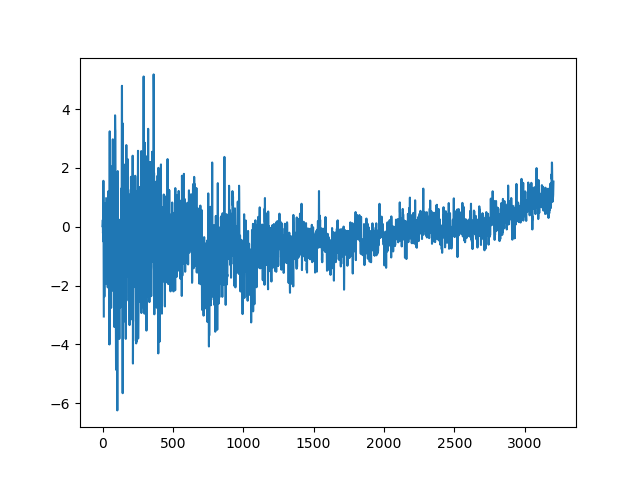

In [34]:
plt.figure()
plt.plot(global_temp_anomaly)


In [30]:
def celsius_to_fahrenheit(temperature):
    return temperature * 9/5 + 32

def celsius_to_fahrenheit_diff(temperature_difference):
    return temperature_difference * 9/5


In [31]:
global_temp_anomaly_F = np.apply_along_axis(celsius_to_fahrenheit_diff, 0, global_temp_anomaly)

<IPython.core.display.Javascript object>


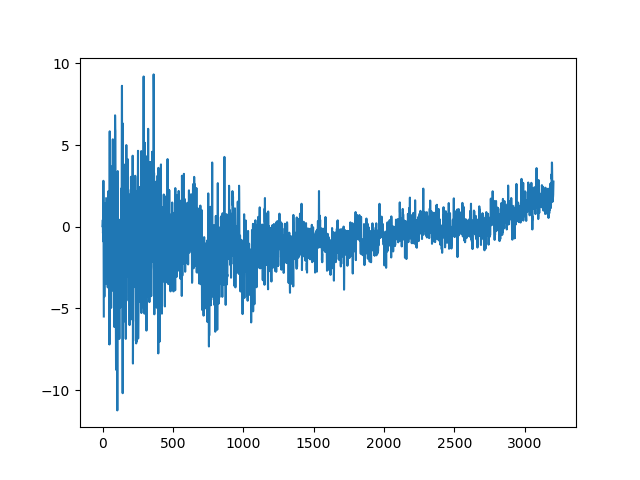

In [35]:
plt.figure()
plt.plot(global_temp_anomaly_F)

In [37]:
global_temp_anomaly.shape

(3205,)

In [41]:
global_temp_anomaly[100:1000] # get rid of the nans in the beginning....

array([ -2.07700000e+00,  -3.18000000e-01,  -5.88000000e-01,
        -2.59300000e+00,  -2.56100000e+00,  -6.24800000e+00,
         4.77000000e-01,  -1.21200000e+00,   1.89400000e+00,
         1.09000000e+00,  -3.90000000e-01,  -2.66700000e+00,
        -1.55500000e+00,  -2.90000000e-02,  -1.95900000e+00,
         2.46000000e-01,   1.17000000e-01,  -1.12400000e+00,
        -2.24700000e+00,  -3.81700000e+00,  -3.77500000e+00,
        -2.33000000e-01,  -2.76100000e+00,  -1.10800000e+00,
        -1.16500000e+00,  -1.46900000e+00,  -1.59500000e+00,
        -5.04000000e-01,  -1.49300000e+00,  -2.60600000e+00,
        -1.06100000e+00,  -2.10000000e+00,  -2.71900000e+00,
         1.11000000e-01,   1.30600000e+00,  -1.30700000e+00,
         1.68100000e+00,   3.50000000e+00,   4.79500000e+00,
         8.17000000e-01,  -1.47000000e-01,  -1.98600000e+00,
        -1.44800000e+00,  -5.66300000e+00,   3.51300000e+00,
         1.85800000e+00,  -1.09600000e+00,   4.13000000e-01,
        -9.47000000e-01,

In [42]:
np.mean(global_temp_anomaly[100:1000])

-0.5799766666666667

<IPython.core.display.Javascript object>


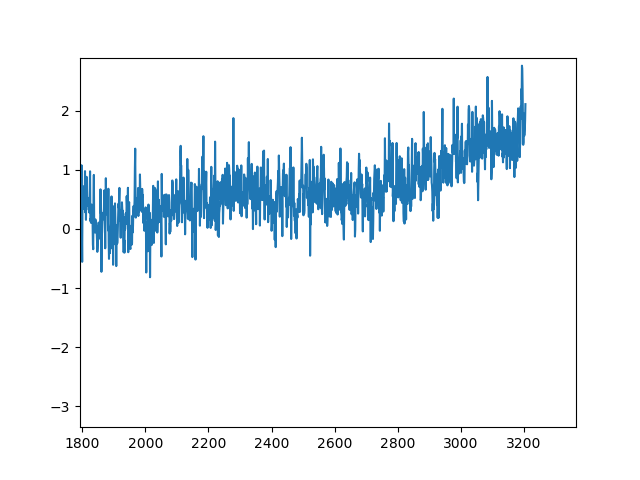

In [45]:
plt.figure()
plt.plot(global_temp_anomaly - np.mean(global_temp_anomaly[100:1000]))